# Probando el proceso con una sola imagen

Una vez conforme con el resultado creo un bucle que procese el dataset

* Cargo las librerías necesarias y hago algunas inicializaciones

In [1]:
# librerias, inicializaciones y constantes
import skimage.io
import skimage.transform
import skimage.feature
import matplotlib.pyplot as plt
# comando de Jupyter para que las imagenes se muestren automaticamente 
%matplotlib inline
tam_final = (200,200)

* Cargo y muestro la imagen de prueba

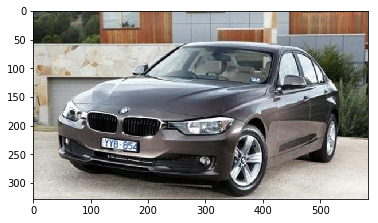

In [2]:
img = skimage.io.imread("car1.jpg")
plt.imshow(img)

* Normalizo la imagen a un tamaño fijo

Esto es necesario para el procesamiento posterior.

<class 'numpy.ndarray'>  --  (200, 200, 3)


C:\Users\moviles\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


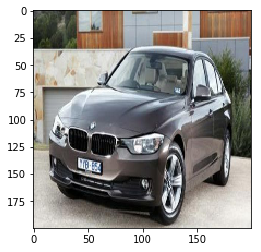

In [4]:
img_res = skimage.transform.resize(img, tam_final)
plt.imshow(img_res)
# veo el tipo y dimensiones de la imagen generada 
# hago esto para entender un error que aparecía al generar el HOG:
# "ValueError: The parameter `image` must be a 2-dimensional array"
print(type(img_res)," -- ",img_res.shape)


- creo el HOG para un canal de color

skimage.feature.hog requiere que la imagen sea un ndarray de dos dimensiones, por lo que puedo:

-- procesar un canal en concreto ¿alguno sería mas útil que los otros?

-- usar una unión de canales (promedio, suma, ... )

-- cargar la imagen inicial en escala de grises (un caso del punto anterior) 


[0.03885652 0.01044248 0.02654524 ... 0.00554277 0.00930985 0.00805959]


C:\Users\moviles\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


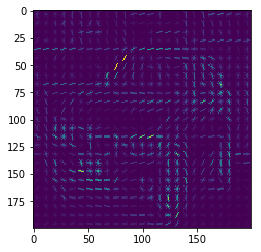

In [5]:
# veamos que pasa con el canal 0
(data, imagen) =skimage.feature.hog(img_res[:,:,0], visualise=True)
# al colocar visualise en True, hog devuelve dos parámetros, sino solo uno
print(data)
plt.imshow(imagen)

## Ahora en escala de grises
repito todo el proceso anterior con un único cambio en la forma en que se carga la imagen

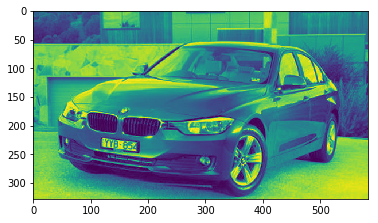

In [9]:
imgGris = skimage.io.imread("car1.jpg", as_grey=True)
plt.imshow(imgGris)


<class 'numpy.ndarray'>  --  (50, 50)


C:\Users\moviles\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


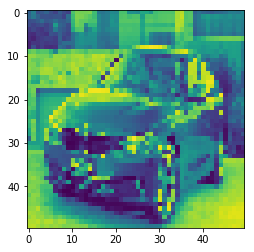

In [10]:
img_resGris = skimage.transform.resize(imgGris, tam_final)
plt.imshow(img_resGris)
print(type(img_resGris)," -- ",img_resGris.shape)

[0.00818195 0.0033156  0.00169191 ... 0.00117586 0.00027603 0.00018   ]


C:\Users\moviles\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


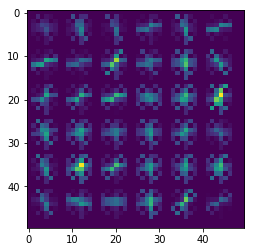

In [12]:
(dataGris, imagenGris) =skimage.feature.hog(img_resGris, visualise=True)
print(dataGris)
plt.imshow(imagenGris)

En principio le voy a pasar un dataset de HOGs grises al SVM, pero una vez en marcha ese paso sería interesante probar si algún color o relación entre ellos da mejores resultados.